In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Sample 14days_food_preparation_All.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 53 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   JobAcceptedDate                                             10000 non-null  object 
 1   calledMerchantTime                                          10000 non-null  object 
 2   mealPickedUpTime                                            10000 non-null  object 
 3   Merchant.Lat                                                10000 non-null  float64
 4   Merchant.Lng                                                10000 non-null  float64
 5   NationFoodCategory                                          10000 non-null  object 
 6   FoodCategories                                              10000 non-null  object 
 7   NationFoodCategory_International                            10000 non-null  int64  
 8

<AxesSubplot: ylabel='Frequency'>

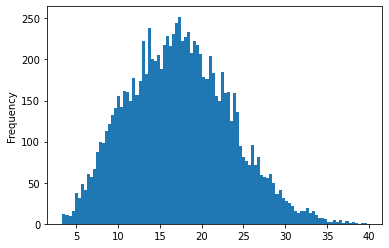

In [4]:
df['calledMerchantTime_to_mealPickedUpTime (m)'].plot(kind='hist', bins=100)

In [5]:
df['calledMerchantTime_to_arrivedAtMerchantTime_prediction (m)']

0        6.687714
1       10.557847
2       10.613229
3       14.482695
4        6.687714
          ...    
9995    10.582157
9996     6.687714
9997    10.613229
9998    14.482695
9999    10.607444
Name: calledMerchantTime_to_arrivedAtMerchantTime_prediction (m), Length: 10000, dtype: float64

<AxesSubplot: ylabel='Frequency'>

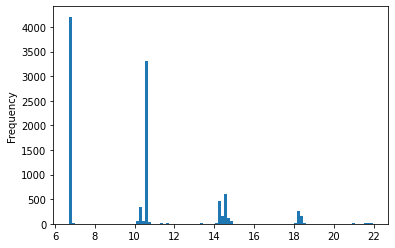

In [6]:
df['calledMerchantTime_to_arrivedAtMerchantTime_prediction (m)'].plot(kind='hist', bins=100)

<AxesSubplot: ylabel='Frequency'>

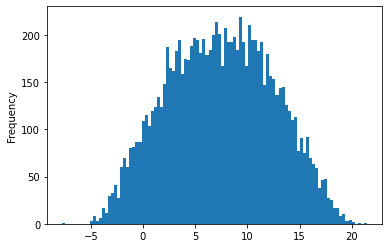

In [7]:
(df['calledMerchantTime_to_mealPickedUpTime (m)'] - df['calledMerchantTime_to_arrivedAtMerchantTime_prediction (m)']).plot(kind='hist', bins=100)

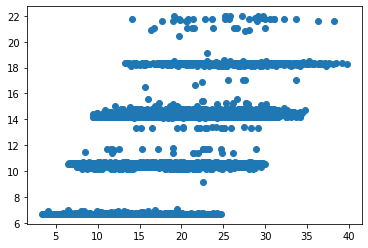

In [8]:
plt.scatter(df['calledMerchantTime_to_mealPickedUpTime (m)'], df['calledMerchantTime_to_arrivedAtMerchantTime_prediction (m)'])

In [9]:
df['calledMerchantTime_to_arrivedAtMerchantTime_prediction (m)'].describe()

count    10000.000000
mean         9.888235
std          3.366624
min          6.687714
25%          6.687714
50%         10.557847
75%         10.607444
max         21.967718
Name: calledMerchantTime_to_arrivedAtMerchantTime_prediction (m), dtype: float64

((array([-3.81060943, -3.58545756, -3.46184782, ...,  3.46184782,
          3.58545756,  3.81060943]),
  array([ 6.68771372,  6.68771372,  6.68771372, ..., 21.96771816,
         21.96771816, 21.96771816])),
 (3.0428687325641417, 9.88823492390531, 0.9035557083420733))

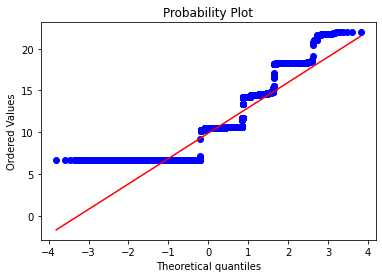

In [10]:
# q-q plot
import scipy.stats as stats
x = df['calledMerchantTime_to_arrivedAtMerchantTime_prediction (m)']
stats.probplot(x, dist="norm", plot=plt)

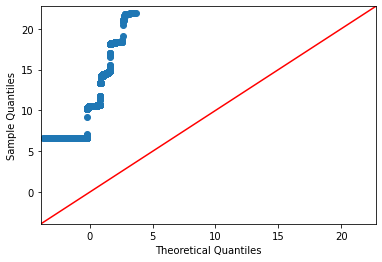

In [11]:
import statsmodels.api as sm
import pylab as py
  
sm.qqplot(x, line ='45')
py.show()

In [12]:
# Shapiro-Wilk Test
from scipy.stats import shapiro
stat, p = shapiro(x)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('calledMerchantTime_to_arrivedAtMerchantTime_prediction looks Gaussian (fail to reject H0)')
else:
    print('calledMerchantTime_to_arrivedAtMerchantTime_prediction does not look Gaussian (reject H0)')

Statistics=0.816, p=0.000
calledMerchantTime_to_arrivedAtMerchantTime_prediction does not look Gaussian (reject H0)


c:\Users\PoraRee\.conda\envs\EAT\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [13]:
# Kolmogorov-Smirnov Test
from scipy.stats import kstest
stat, p = kstest(x, 'norm')
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
lambda_ = 0.05
if p > alpha:
    print('calledMerchantTime_to_arrivedAtMerchantTime_prediction looks Gaussian (fail to reject H0)')
else:
    print('calledMerchantTime_to_arrivedAtMerchantTime_prediction does not look Gaussian (reject H0)')

Statistics=1.000, p=0.000
calledMerchantTime_to_arrivedAtMerchantTime_prediction does not look Gaussian (reject H0)


((array([-3.81060943, -3.58545756, -3.46184782, ...,  3.46184782,
          3.58545756,  3.81060943]),
  array([ 3.36666667,  3.43333333,  3.43333333, ..., 38.45      ,
         39.15      , 39.73333333])),
 (6.058778554183854, 17.318068333333333, 0.9963470852392098))

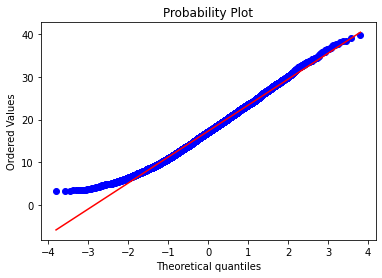

In [14]:
# q-q plot
import scipy.stats as stats
x = df['calledMerchantTime_to_mealPickedUpTime (m)']
stats.probplot(x, dist="norm", plot=plt)

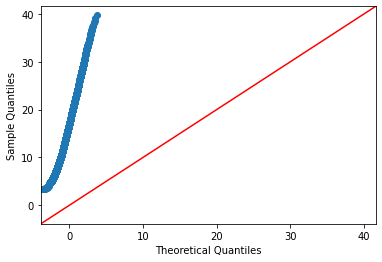

In [15]:
sm.qqplot(x, line ='45')
py.show()

In [16]:
# Shapiro-Wilk Test
from scipy.stats import shapiro
stat, p = shapiro(df['calledMerchantTime_to_arrivedAtMerchantTime_prediction (m)'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('calledMerchantTime_to_mealPickedUpTime looks Gaussian (fail to reject H0)')
else:
    print('calledMerchantTime_to_mealPickedUpTime does not look Gaussian (reject H0)')

Statistics=0.816, p=0.000
calledMerchantTime_to_mealPickedUpTime does not look Gaussian (reject H0)


In [18]:
# Kolmogorov-Smirnov Test
from scipy.stats import kstest
stat, p = kstest(x, 'norm')
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
lambda_ = 0.05
if p > alpha:
    print('calledMerchantTime_to_mealPickedUpTime looks Gaussian (fail to reject H0)')
else:
    print('calledMerchantTime_to_mealPickedUpTime does not look Gaussian (reject H0)')

Statistics=1.000, p=0.000
calledMerchantTime_to_mealPickedUpTime does not look Gaussian (reject H0)
